### This notebook shows how to store in a single file a numpy array and the methods to handle it. It uses the dill library, an extension of pickle. 

In [ ]:
import dill
import numpy as np
import matplotlib.pyplot as plt

### Lets define a class to store a numpy array and some useful methods. We will also add some auxiliary methods to allows us to store an instantiated object, data and methods.

In [ ]:
#---
class ArrayHandler:
    def __init__(self, data):
        self.data = data

    def get_value(self, index):
        """Return the value at the given index."""
        if 0 <= index < len(self.data):
            return self.data[index]
        else:
            raise IndexError("Index out of bounds")

    def plot(self):
        """Display the array as a plot."""
        import matplotlib.pyplot as plt
        plt.plot(self.data)
        plt.title("Array Plot")
        plt.xlabel("Index")
        plt.ylabel("Value")
        plt.grid()
        plt.show()

    def compute_statistics(self):
        """Compute and return basic statistics of the array."""
        return {
            "mean": sum(self.data) / len(self.data),
            "max": max(self.data),
            "min": min(self.data),
        }

    def help(self):
        """Display the methods, their descriptions, and signatures."""
        methods = [method for method in dir(self) if callable(getattr(self, method)) and not method.startswith("__")]
        print("Available methods and their descriptions:")
        for method_name in methods:
            method = getattr(self, method_name)
            signature = inspect.signature(method)
            doc = method.__doc__ if method.__doc__ else "No description available."
            print(f"{method_name}{signature}: {doc}")
    
    def __getstate__(self):
        """Customize the state for serialization."""
        state = self.__dict__.copy()
        # Include method descriptions
        state['method_descriptions'] = {
            'get_value':          self.get_value.__doc__,
            'plot':               self.plot.__doc__,
            'compute_statistics': self.compute_statistics.__doc__,
        }
        return state

    def __setstate__(self, state):
        """Restore the state from the serialized state."""
        self.__dict__.update(state)
        # Restore method descriptions if needed
        # Not necessary to restore method descriptions on deserialization



### Now we create and save an object using dill (a fancier pickle). The .dill file will contain the serialized object.

In [ ]:
# Create an instance of the class
data = [1, 2, 3, 4, 5]
array_handler = ArrayHandler(data)

# Serialize the object to a file
with open("array_handler.dill", "wb") as outfile:
    dill.dump(array_handler, outfile)

***
***
### Restart notebook and run from here

In [1]:
import dill
import numpy as np
import matplotlib.pyplot as plt
import inspect

### Read serialized object, note that the object has also its methods stored

In [4]:

#--- Deserialize the object from the file
with open("array_handler.dill", "rb") as infile:
    sdss = dill.load(infile)


In [5]:
sdss.help()

Available methods and their descriptions:
compute_statistics(): Compute and return basic statistics of the array.
get_value(index): Return the value at the given index.
help(): Display the methods, their descriptions, and signatures.
plot(): Display the array as a plot.


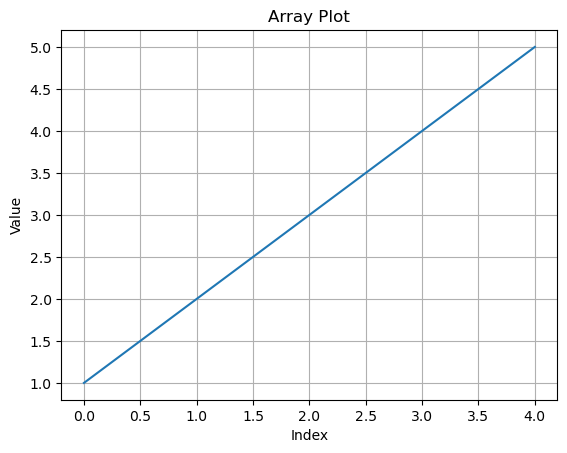

In [6]:
sdss.plot()